In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 300,
})

# data
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
stats = {
    'Base BERT': [0.92, 0.89, 0.92, 0.91],
    'Data Augmented BERT': [0.89, 0.85, 0.89, 0.87],
    'Weighted BERT': [0.92, 0.88, 0.92, 0.90],
}

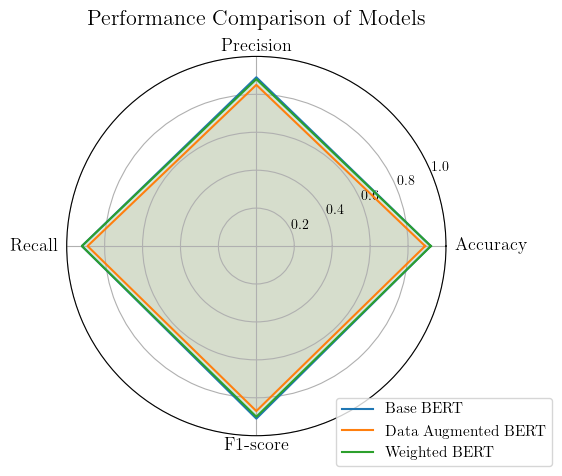

In [3]:
# setup the data
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# prepare the plot
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw=dict(polar=True))

# plot the data
for model, scores in stats.items():
    values = scores + scores[:1]
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# draw lines without labels
ax.set_thetagrids(np.degrees(angles[:-1]), ["" for _ in labels])  

# draw labels
for i, label in enumerate(labels):
    angle_rad = angles[i]
    if i == 0:
        ha = 'left'
    elif i == 2:
        ha = 'right'
    else:
        ha = 'center'

    ax.text(
        angle_rad,
        1.05,
        label,
        size=13,
        horizontalalignment=ha,
        verticalalignment='center',
        transform=ax.get_xaxis_transform(),
    )

# minor adjustments to the plot
ax.set_ylim(0, 1)
ax.set_title('Performance Comparison of Models\n', size=16)
ax.legend(loc='lower right', bbox_to_anchor=(1.3, -0.1), fontsize=11)

# plot it
plt.tight_layout()
plt.savefig('assets/results_radarchart.png', transparent=True, bbox_inches='tight')
plt.show()